<a href="https://colab.research.google.com/github/ramselvaraj/F1-Twitter-Sentiment-Analysis/blob/main/F1sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "http://www.formulanerds.com/wp-content/uploads/2022/10/second-time-lucky-for-the-japanese-grand-prix-sees-on-track-battles-and-dominant-drives.jpg" height = 300 width = 500></img>
# **F1 Twitter Sentiment Analysis**
## Sentiment Analysis of F1 Twitter after Redbull won the 2022 Constructor's Championship
In this project I aim to analyze the sentiment of F1 twitter after RedBull won the 2022 Constructor's Championship
<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/F1TwitterSentimentAnalysis/repliesFinal.csv')
df = df[['text','sentiment']]
df.head()

,text,sentiment
0,congrats all,pos
1,cheats do prosper it seems,neg
2,we are champions,pos
3,it s shame that even horner can t admit over s...,neg
4,lets gooooooo,pos


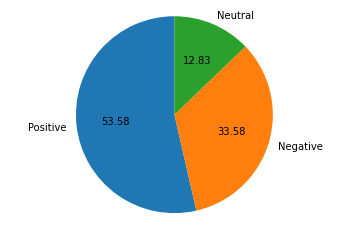

In [ ]:
pieLabels=["Positive","Negative","Neutral"]
populationShare=[len(df[df['sentiment'] == 'pos'].index),len(df[df['sentiment'] == 'neg'].index),len(df[df['sentiment'] == 'neu'].index)]
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)
axesObject.axis('equal')
plt.show()

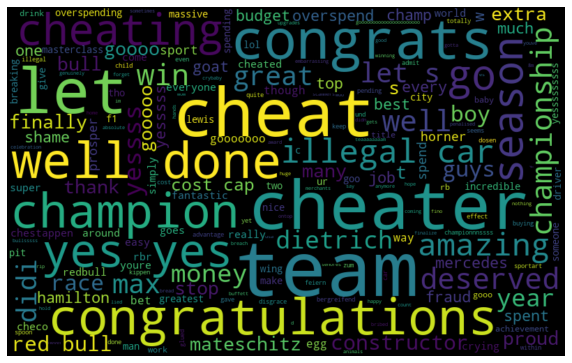

In [ ]:
all_words = ' '.join([text for text in df['text'].values])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
sentiment_objects = [TextBlob(tweet) for tweet in df['text']]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values[:5]

[[0.0, 'congrats all'],
 [0.0, 'cheats do prosper it seems'],
 [0.0, 'we are champions'],
 [0.0,
  'it s shame that even horner can t admit over spend keep sport disgrace'],
 [0.0, 'lets gooooooo']]

Clearly the default classifier doesn't seem to work well for tweets, so we build our own.

Splitting into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2)
train = []
test = []
for i in range(len(X_train)):
  train.append((X_train.values[i],y_train.values[i]))
train
for i in range(len(X_test)):
  test.append((X_test.values[i],y_test.values[i]))
test[0:6]

[('cheater', 'neg'),
 ('congratulations you cheating', 'neg'),
 ('you did cheat though which has gave you quite advantage', 'neg'),
 ('illegal car congratulations', 'neg'),
 ('amazing season amazing race so so deserved', 'pos'),
 ('lets go rb', 'pos')]

Building custom classifier-

In [ ]:
!python -m textblob.download_corpora

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

In [ ]:
cl.accuracy(test)

0.7407407407407407